# 📚 Laptop Price Prediction using AutoGluon

In this notebook, we aim to predict laptop prices using the **AutoGluon** AutoML framework. AutoGluon automates the machine learning workflow, including feature preprocessing, model selection, hyperparameter tuning, and ensembling. The goal is to build a high-performing regression model with minimal manual intervention.

**Dataset**: The dataset consists of various laptop features such as brand, processor, RAM, and more, along with the corresponding price.

## 🧾 Data Definitions

| Column Name            | Description                                      | Data Type |
|-------------------------|--------------------------------------------------|-----------|
| Brand                   | Manufacturer brand of the laptop                | object    |
| Processor               | Processor model                                 | object    |
| RAM (GB)                | Size of RAM in GB                                | int64     |
| Storage                 | Storage capacity and type (e.g., SSD, HDD)       | object    |
| GPU                     | Graphics Card model                             | object    |
| Screen Size (inch)      | Size of the laptop screen in inches              | float64   |
| Resolution              | Screen resolution                               | object    |
| Battery Life (hours)    | Battery backup life in hours                    | float64   |
| Weight (kg)             | Weight of the laptop in kilograms               | float64   |
| Operating System        | Pre-installed operating system                  | object    |
| Price ($)               | Selling price of the laptop (Target Variable)    | float64   |


## Importing necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split

## 📂 Data Loading and Exploration

In [8]:
#Loading Dataset
df = pd.read_csv('laptop_prices.csv')
df.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


- Also, to check out the link of y-data profile of the dataset
- [Exploratory Data Analysis Report - Laptop Dataset](https://aayushsingh2708.github.io/EDA_Reports/)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RAM (GB),11768.0,24.852821,21.762567,4.00,8.000,16.000,32.00,64.00
Screen Size (inch),11768.0,15.212305,1.436997,13.30,14.000,15.600,16.00,17.30
Battery Life (hours),11768.0,8.027855,2.305400,4.00,6.000,8.000,10.00,12.00
Weight (kg),11768.0,2.341117,0.667921,1.20,1.760,2.340,2.91,3.50
Price ($),11768.0,2183.571608,1316.886132,279.57,1272.045,1840.865,2698.37,10807.88


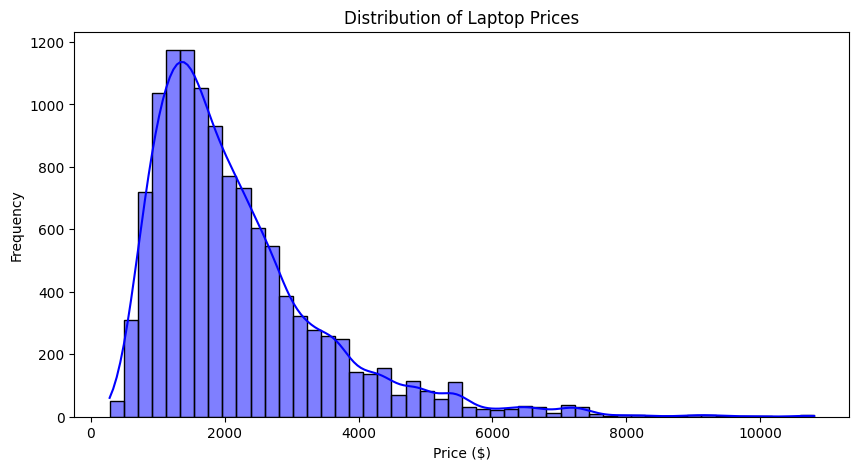

In [11]:
#Distribution of the target variable
plt.figure(figsize=(10, 5))
sns.histplot(df["Price ($)"], bins=50, kde=True, color="blue")
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()

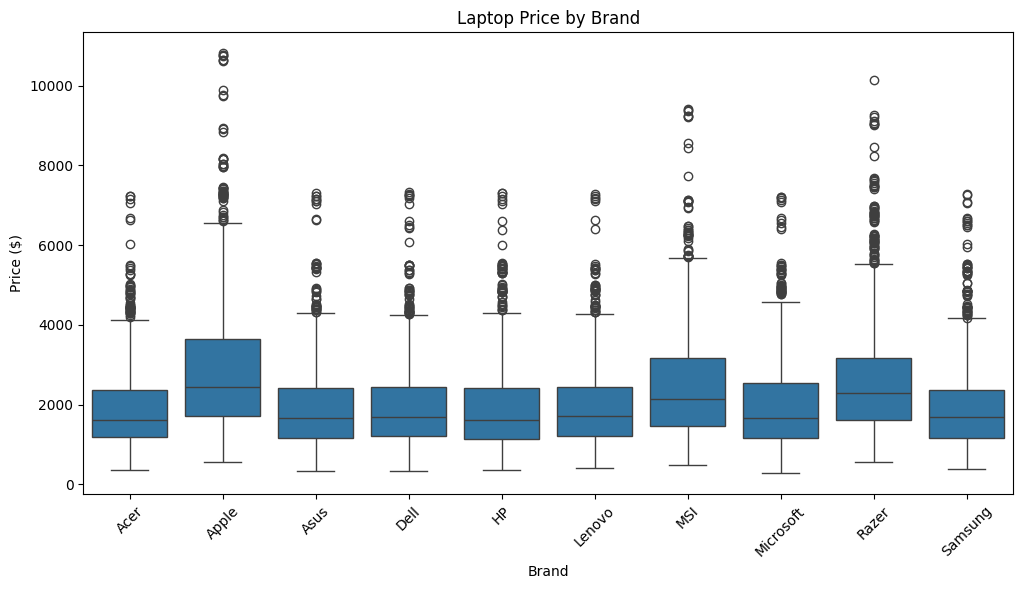

In [12]:
#Boxplot of Price by Brand
plt.figure(figsize=(12, 6))
sns.boxplot(x="Brand", y="Price ($)", data=df, order=df.groupby("Brand")["Price ($)"].median().index)
plt.xticks(rotation=45)
plt.title("Laptop Price by Brand")
plt.show()

## Treating Outliers

In [ ]:
#Using Log Transformation
df['Log_Price'] = np.log1p(df['Price ($)'])

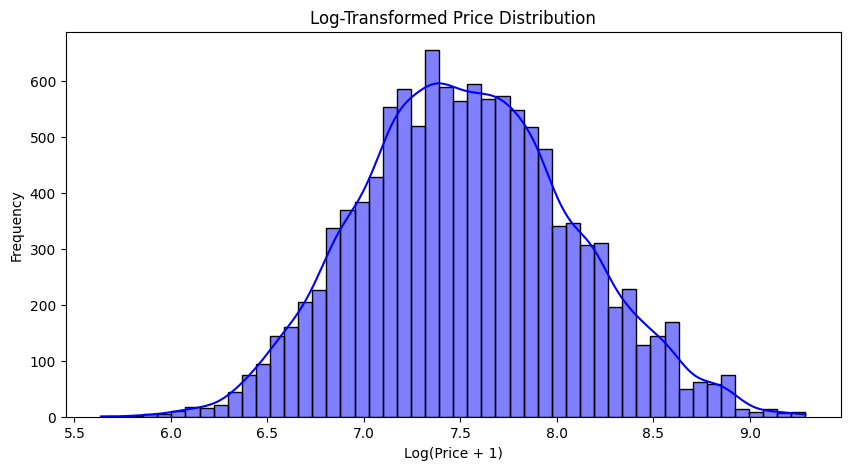

In [19]:
#Distribution of the target variable after log transformation
plt.figure(figsize=(10, 5))
sns.histplot(df["Log_Price"], bins=50, kde=True, color="blue")
plt.title("Log-Transformed Price Distribution")
plt.xlabel("Log(Price + 1)")
plt.ylabel("Frequency")
plt.show()


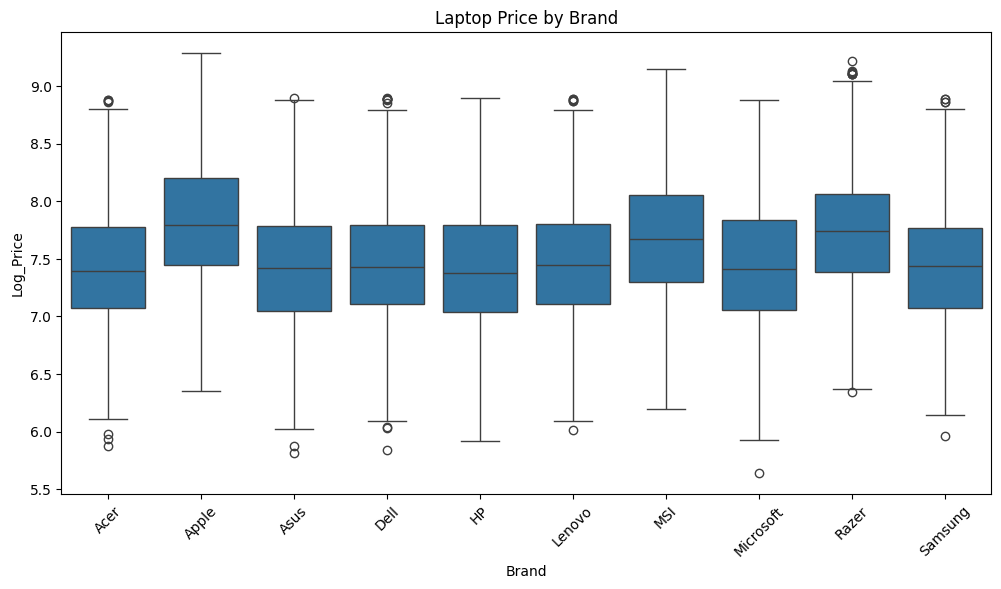

In [20]:
#Boxplot of Log_Price by Brand
plt.figure(figsize=(12, 6))
sns.boxplot(x="Brand", y="Log_Price", data=df, order=df.groupby("Brand")["Price ($)"].median().index)
plt.xticks(rotation=45)
plt.title("Laptop Price by Brand")
plt.show()

## 🤖 Model Building using AutoGluon

In [25]:
#Dropping "Price $" as we have transformed it
X = df.drop(columns=['Price ($)'], inplace = True)

In [ ]:
#Splitting the dataset into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [27]:
#Defining the target variable and fitting the model
target = 'Log_Price'
predictor = TabularPredictor(label=target).fit(train_data)

No path specified. Models will be saved in: "AutogluonModels\ag-20250411_180906"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.4
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          8
Memory Avail:       1.03 GB / 7.65 GB (13.5%)
Disk Space Avail:   272.16 GB / 475.83 GB (57.2%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         : 

In [36]:
#Displaying the Model's Leaderboard
predictor.leaderboard(silent=True)

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-0.058683,root_mean_squared_error,0.324157,141.913291,0.004739,0.032055,2,True,11
1,CatBoost,-0.059464,root_mean_squared_error,0.027633,100.881570,0.027633,100.881570,1,True,6
2,NeuralNetFastAI,-0.060947,root_mean_squared_error,0.063318,35.908927,0.063318,35.908927,1,True,8
3,LightGBM,-0.061223,root_mean_squared_error,0.209822,2.474707,0.209822,2.474707,1,True,4
4,XGBoost,-0.063754,root_mean_squared_error,0.018645,2.616033,0.018645,2.616033,1,True,9
5,LightGBMLarge,-0.066167,root_mean_squared_error,0.047561,6.376539,0.047561,6.376539,1,True,10
6,LightGBMXT,-0.138023,root_mean_squared_error,0.049348,29.786427,0.049348,29.786427,1,True,3
7,RandomForestMSE,-0.174395,root_mean_squared_error,0.194299,2.967989,0.194299,2.967989,1,True,5
8,ExtraTreesMSE,-0.185757,root_mean_squared_error,0.143754,3.364673,0.143754,3.364673,1,True,7
9,KNeighborsUnif,-0.460903,root_mean_squared_error,0.167063,0.067555,0.167063,0.067555,1,True,1


## 📈 Model Evaluation

In [35]:
#Evaluating performance
performance = predictor.evaluate(test_data) 

c:\Users\aayus\OneDrive\Desktop\V_Env_Pycaret\pycaret_env\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [32]:
#Displaying the performance metrics
performance_df = pd.DataFrame(list(performance.items()), columns=['Metric', 'Value'])
performance_df

,Metric,Value
0,root_mean_squared_error,-0.060864
1,mean_squared_error,-0.003704
2,mean_absolute_error,-0.046117
3,r2,0.987884
4,pearsonr,0.993939
5,median_absolute_error,-0.036223


In [ ]:
#Getting Feature Importance
feature_importance = predictor.feature_importance(test_data)
print(feature_importance)

Computing feature importance via permutation shuffling for 10 features using 2354 rows with 5 shuffle sets...
c:\Users\aayus\OneDrive\Desktop\V_Env_Pycaret\pycaret_env\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
	20.93s	= Expected runtime (4.19s per shuffle set)
c:\Users\aayus\OneDrive\Desktop\V_Env_Pycaret\pycaret_env\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If

                      importance    stddev       p_value  n  p99_high  \
RAM (GB)                0.435887  0.005500  3.041775e-09  5  0.447212   
Processor               0.303684  0.002100  2.742597e-10  5  0.308008   
Resolution              0.300130  0.003999  3.782200e-09  5  0.308364   
Brand                   0.163459  0.002949  1.270030e-08  5  0.169530   
GPU                     0.141213  0.001325  9.312743e-10  5  0.143943   
Storage                 0.056235  0.001257  2.997525e-08  5  0.058824   
Screen Size (inch)      0.028117  0.000573  2.066131e-08  5  0.029297   
Weight (kg)             0.000148  0.000030  1.885644e-04  5  0.000210   
Operating System       -0.000020  0.000061  7.452267e-01  5  0.000106   
Battery Life (hours)   -0.000030  0.000061  8.322136e-01  5  0.000096   

                       p99_low  
RAM (GB)              0.424561  
Processor             0.299361  
Resolution            0.291895  
Brand                 0.157388  
GPU                   0.138484 

## 🔍 Prediction Example

In [33]:
#Predicting on the test set
y_pred = predictor.predict(test_data.drop(columns=[target]))
y_pred.head()

c:\Users\aayus\OneDrive\Desktop\V_Env_Pycaret\pycaret_env\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


10445    7.050584
6057     7.217710
10999    7.688065
11310    6.843649
11258    7.198432
Name: Log_Price, dtype: float32

# 📋 Conclusion

## 🎯 Objective:
The goal was to predict **Laptop Prices ($)** using various hardware and brand features through a **regression model** trained with **AutoGluon**.

---

## 🧠 Model Performance:

The trained model demonstrated excellent predictive accuracy:

| Metric | Value |
|:------|------:|
| **Root Mean Squared Error (RMSE)** | 0.0609 |
| **Mean Squared Error (MSE)** | 0.0037 |
| **Mean Absolute Error (MAE)** | 0.0461 |
| **R² Score (R2)** | 0.9879 |
| **Pearson Correlation (r)** | 0.9939 |
| **Median Absolute Error** | 0.0362 |

✅ **Interpretation:**  
- An **R² Score of 0.9879** and a **Pearson correlation of 0.9939** indicate a **very strong linear relationship** between the actual and predicted laptop prices.
- The **low RMSE** and **MAE** values show that the model is making **very accurate predictions** with minimal average error.
  
Overall, the model is **highly reliable** for price prediction tasks based on the features provided.

---

## 📊 Feature Importance Insights:

The most influential factors affecting laptop price prediction were:

| Feature | Importance |
|:--------|------------:|
| RAM (GB) | 0.4359 |
| Processor | 0.3037 |
| Resolution | 0.3001 |
| Brand | 0.1635 |
| GPU | 0.1412 |

✅ **Interpretation:**  
- **RAM (GB)** was the most critical feature, having the highest positive impact on predicting the price.
- **Processor type** and **Screen Resolution** were also major contributors, indicating the importance of performance specifications and display quality in laptop pricing.
- **Brand** and **GPU** further influenced the price, showing brand value and graphics capabilities are strong secondary factors.
- **Storage**, **Screen Size (inch)**, and **Weight (kg)** had comparatively smaller impacts.
- **Operating System** and **Battery Life (hours)** showed negligible or even slightly negative importance, suggesting they were **not strong determinants** of laptop pricing in this dataset.

---

## 📝 Final Summary:

- The **AutoGluon model** successfully captured the underlying patterns and relationships in the data with **very high accuracy**.
- **Hardware specifications** (especially RAM and Processor) were the **dominant factors** driving laptop prices, rather than software features or weight.
- The model is now ready to be **deployed** for price prediction tasks, product recommendation systems, or further integrated into business intelligence dashboards.

---
